In [2]:
# the following steps are used to import our dataset into googlecolab using the kaggle api
!pip install -q kaggle

In [3]:
# upload the kaggle.json file when prompted to upload a file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hamzafarooq360","key":"9d6e273ab6b2254bc93edf4719e56e80"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [8]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

 98% 64.0M/65.2M [00:02<00:00, 36.6MB/s]
100% 65.2M/65.2M [00:02<00:00, 24.2MB/s]


In [9]:
!unzip emotion-detection-fer.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [10]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

!pip install keras
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix
import pathlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
# get the training data
# get total number of images (sample size)
# get class names and number of class names

data_dir = pathlib.Path('/content/train')
image_count = len(list(data_dir.glob('*/*.png')))

# classnames in the dataset specified
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt" ])

# print length of class names
output_class_units = len(CLASS_NAMES)



In [12]:
# ALEX DCNN MODEL with a total of 8 layers: five layers with a combination of max pooling followed by 3 fully connected layers. 

model = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
   tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(output_class_units, activation='sigmoid')
])

In [13]:
# TESTING DATA
data_dir2 = pathlib.Path("/content/test")

# batch size of 32 and dimensions of image are 227x227 is used for the model
          

# steps per epoch is total sample images divided by batch size
STEPS_PER_EPOCH = np.ceil(image_count/32)

# Rescalingthe pixel values from 0~255 to 0~1 For RGB Channels of the image.
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# generate training_data for model training
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     target_size=(227, 227), #Resizing the raw dataset
                                                     classes = list(CLASS_NAMES))
# generate validation data
val_data_gen = image_generator.flow_from_directory(directory=str(data_dir2),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     target_size=(227, 227), #Resizing the raw dataset
                                                     classes = list(CLASS_NAMES))

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [14]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 15.1 MB/s 


In [15]:
# here we are compiling the model before training it using adam as our optimizer
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.SensitivityAtSpecificity(0.5), tf.keras.metrics.SpecificityAtSensitivity(0.5), tf.keras.metrics.AUC(curve='ROC')])

# Summarizing the model architecture and printing it out
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [16]:
# fit the model with our generated training data, total epochs=10, steps per epoch=samplesize/batchsize and validation data
history = model.fit(
      train_data_gen,
      steps_per_epoch=STEPS_PER_EPOCH,
      epochs=10,
    validation_data=val_data_gen
    
)

# we also used GPU here

# Saving the model
model.save('/content/drive/MyDrive/saved_models')

Epoch 1/10
898/898 [==============================] - 155s 156ms/step - loss: 2.5633 - accuracy: 0.2982 - precision: 0.1972 - recall: 0.7650 - sensitivity_at_specificity: 0.7410 - specificity_at_sensitivity: 0.7262 - auc: 0.6791 - val_loss: 1.8948 - val_accuracy: 0.1952 - val_precision: 0.1921 - val_recall: 0.4521 - val_sensitivity_at_specificity: 0.6936 - val_specificity_at_sensitivity: 0.6475 - val_auc: 0.6233
Epoch 2/10
898/898 [==============================] - 138s 153ms/step - loss: 1.6578 - accuracy: 0.3501 - precision: 0.2323 - recall: 0.6947 - sensitivity_at_specificity: 0.8085 - specificity_at_sensitivity: 0.7794 - auc: 0.7262 - val_loss: 1.5950 - val_accuracy: 0.3742 - val_precision: 0.2445 - val_recall: 0.7347 - val_sensitivity_at_specificity: 0.8401 - val_specificity_at_sensitivity: 0.8005 - val_auc: 0.7496
Epoch 3/10
898/898 [==============================] - 139s 155ms/step - loss: 1.5533 - accuracy: 0.3950 - precision: 0.2577 - recall: 0.7124 - sensitivity_at_specificit

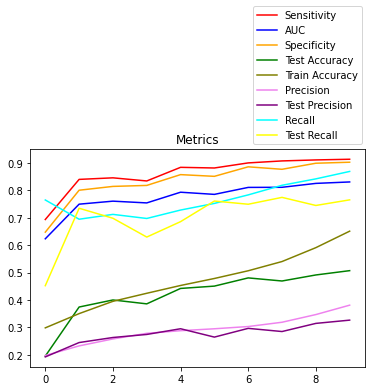

In [17]:
# plotting all our results
def plot_hist(history):
    plt.plot(history.history["val_sensitivity_at_specificity"], color='red')
    plt.plot(history.history["val_auc"], color='blue')
    plt.plot(history.history["val_specificity_at_sensitivity"], color='orange')
    plt.plot(history.history["val_accuracy"],color='green')
    plt.plot(history.history["accuracy"],color='olive')
    plt.plot(history.history["precision"],color='violet')
    plt.plot(history.history["val_precision"],color='purple')
    plt.plot(history.history["recall"],color='cyan')
    plt.plot(history.history["val_recall"],color='yellow')

    plt.title("Metrics")

    plt.legend(["Sensitivity","AUC","Specificity", "Test Accuracy", "Train Accuracy", "Precision", "Test Precision", "Recall", "Test Recall" ], bbox_to_anchor =(0.65, 1.00))
    plt.show()


plot_hist(history)

    
    